In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")

2024-02-23 17:45:53.905367: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-23 17:45:53.905459: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-23 17:45:54.028167: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
def train_df(tr_path):
    classes = []
    class_paths = []
    files = os.listdir(tr_path)
    for file in files:
        label_dir = os.path.join(tr_path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    image_classes = pd.Series(classes, name='Class')
    image_paths = pd.Series(class_paths, name='Class Path')
    tr_df = pd.concat([image_paths, image_classes], axis=1)
    return tr_df

In [3]:
def test_df(ts_path):
    classes = []
    class_paths = []
    files = os.listdir(ts_path)
    for file in files:
        label_dir = os.path.join(ts_path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    image_classes = pd.Series(classes, name='Class')
    image_paths = pd.Series(class_paths, name='Class Path')
    ts_df = pd.concat([image_paths, image_classes], axis=1)
    return ts_df

In [4]:
tr_df = train_df('/kaggle/input/coffee-bean-dataset-resized-224-x-224/train')

In [5]:
tr_df

,Class Path,Class
0,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
1,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
2,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
3,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
4,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
...,...,...
1195,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
1196,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
1197,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
1198,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium


In [6]:
ts_df = test_df('/kaggle/input/coffee-bean-dataset-resized-224-x-224/test')

In [7]:
ts_df

,Class Path,Class
0,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
1,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
2,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
3,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
4,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
...,...,...
395,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
396,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
397,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
398,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium


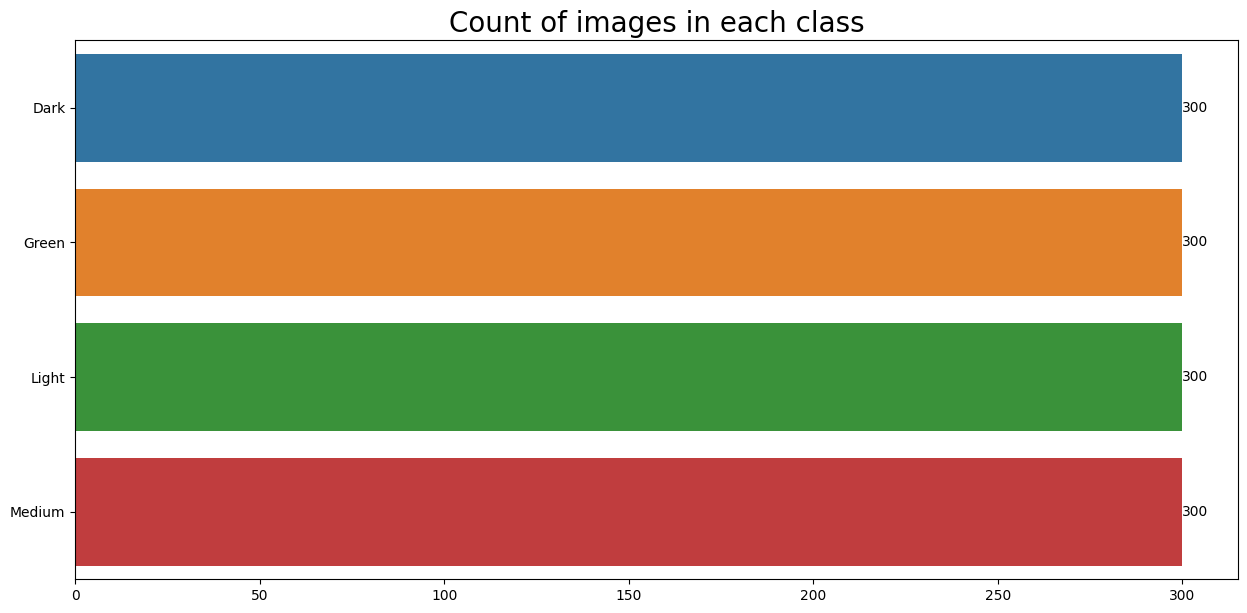

In [8]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

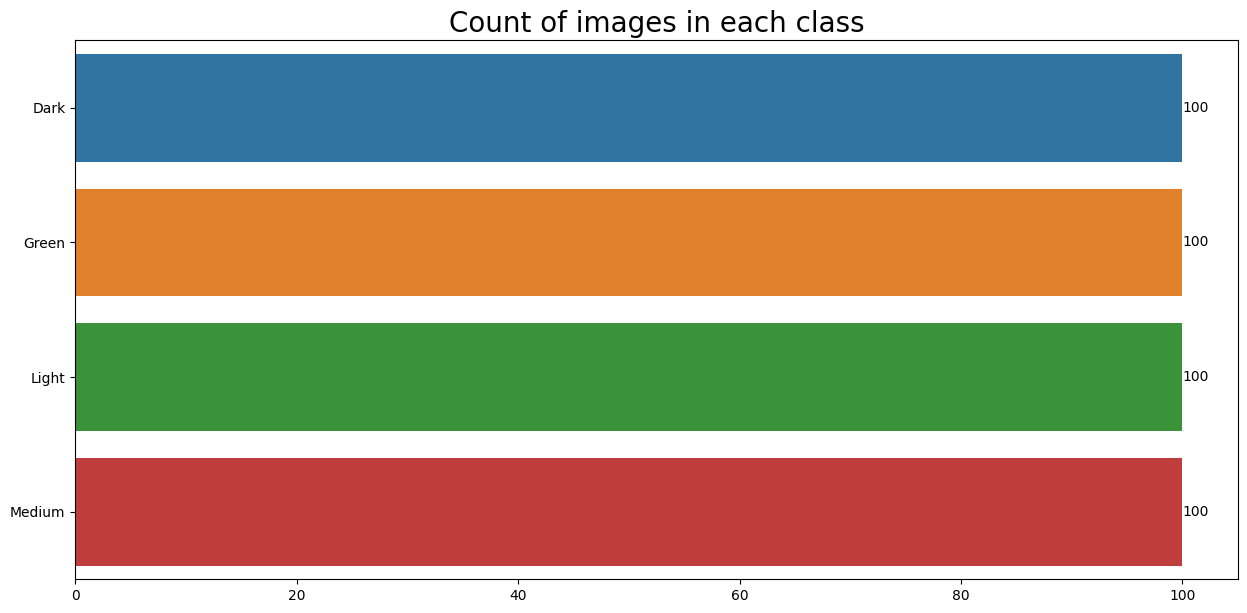

In [9]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df , y=ts_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

In [10]:
valid_df, ts_df = train_test_split(ts_df, train_size=.5, random_state=20)

In [11]:
valid_df

,Class Path,Class
345,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
399,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
330,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
238,/kaggle/input/coffee-bean-dataset-resized-224-...,Light
293,/kaggle/input/coffee-bean-dataset-resized-224-...,Light
...,...,...
393,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
218,/kaggle/input/coffee-bean-dataset-resized-224-...,Light
223,/kaggle/input/coffee-bean-dataset-resized-224-...,Light
271,/kaggle/input/coffee-bean-dataset-resized-224-...,Light


In [12]:
ts_df

,Class Path,Class
10,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
382,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
374,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
196,/kaggle/input/coffee-bean-dataset-resized-224-...,Green
47,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
...,...,...
66,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
281,/kaggle/input/coffee-bean-dataset-resized-224-...,Light
44,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
80,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark


In [13]:
batch_size = 16
img_size = (224,224)

tr_gen = ImageDataGenerator(brightness_range=(.8,1.2))

gen = ImageDataGenerator()


tr_gen = tr_gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                 y_col='Class',batch_size=batch_size,
                                 target_size=img_size)

valid_gen = gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                    y_col='Class',batch_size=batch_size,
                                    target_size=img_size)

ts_gen = gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                y_col='Class',batch_size=batch_size,
                                 target_size=img_size,shuffle=False)

Found 1200 validated image filenames belonging to 4 classes.
Found 200 validated image filenames belonging to 4 classes.
Found 200 validated image filenames belonging to 4 classes.


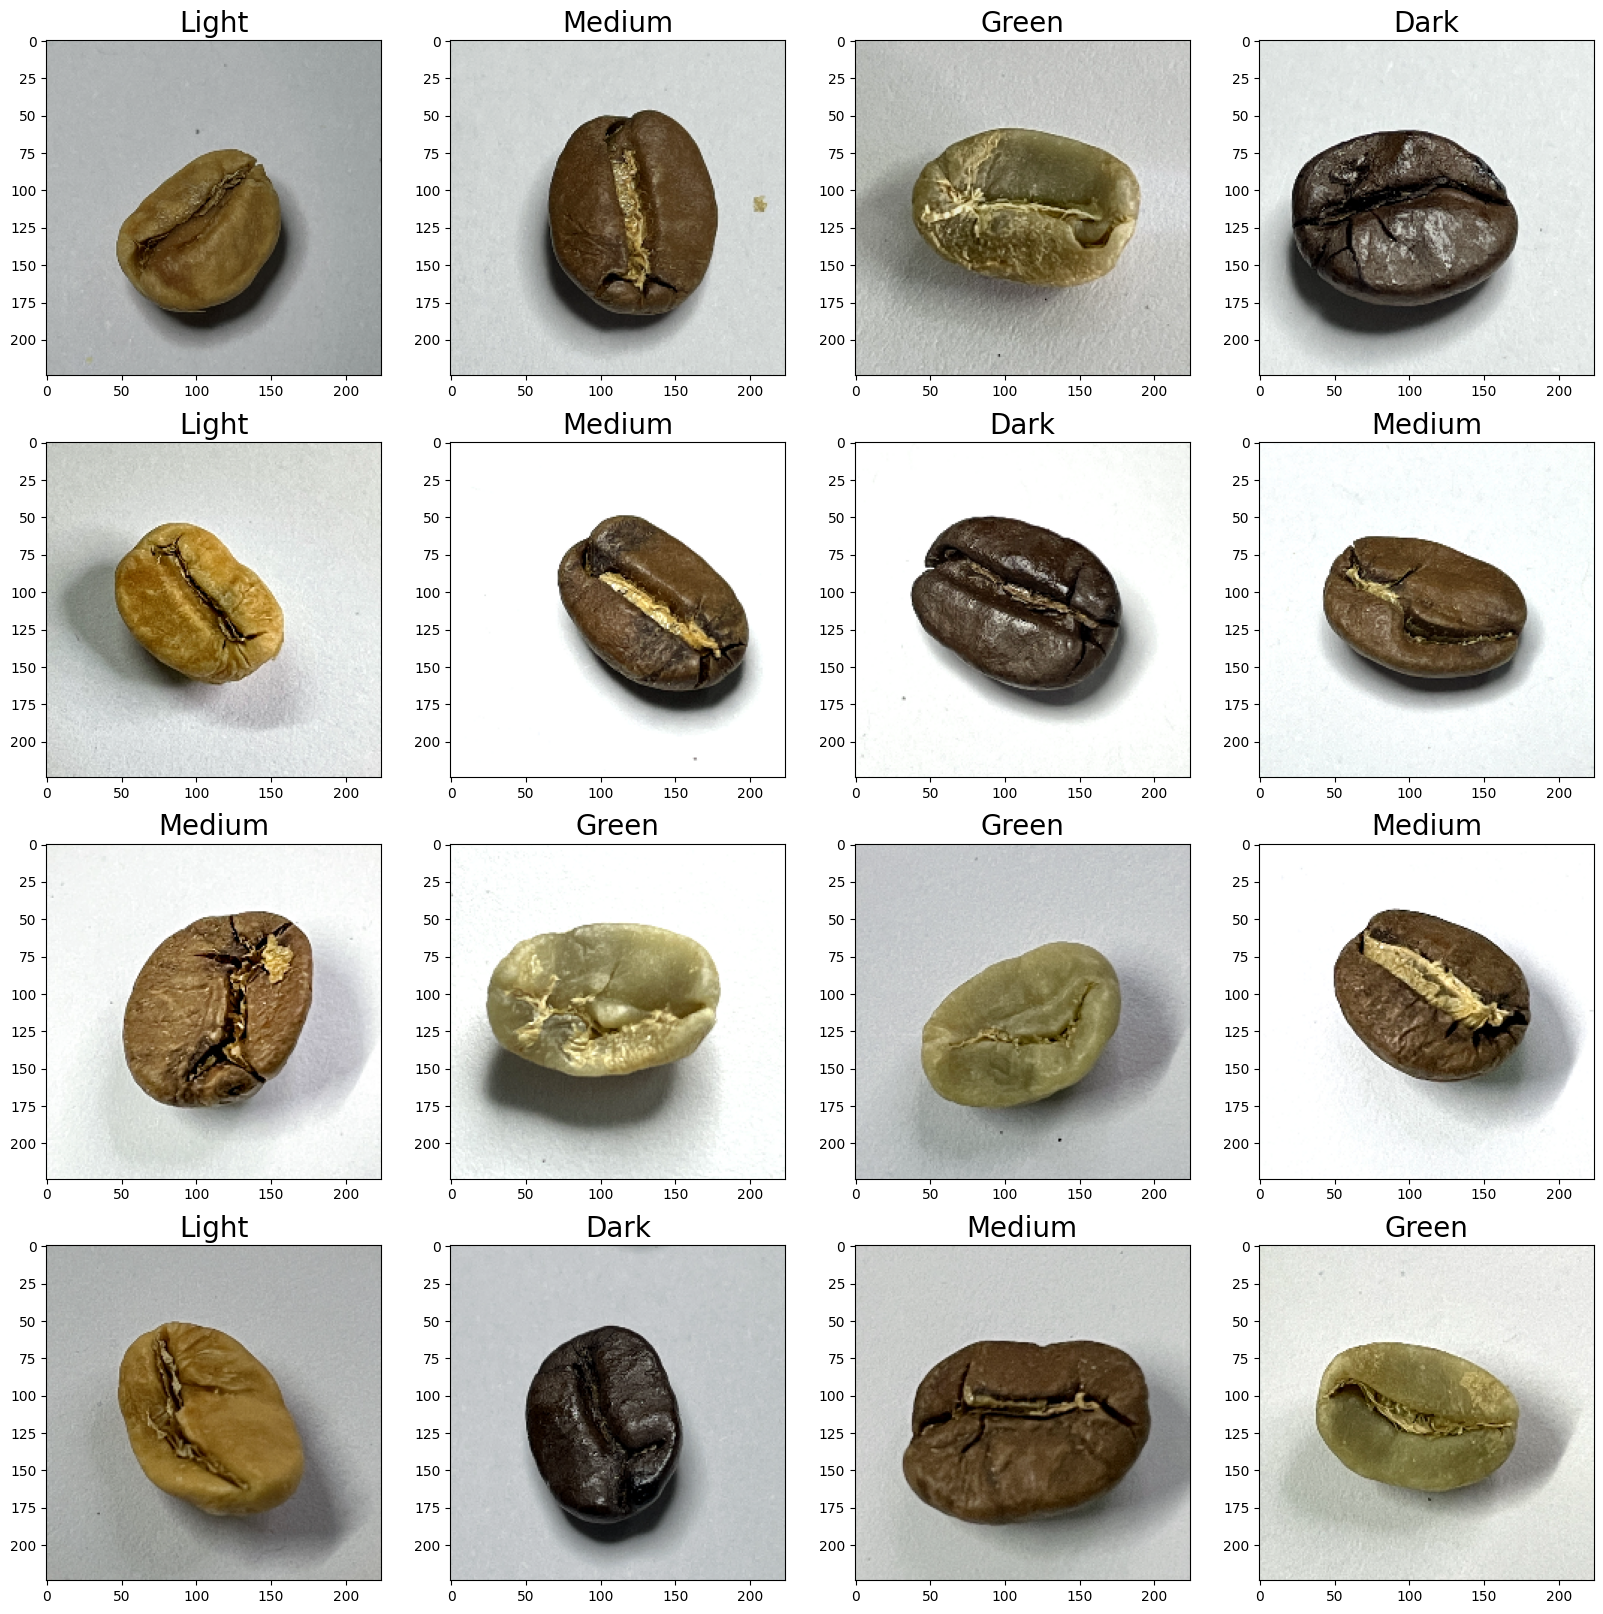

In [14]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(tr_gen)

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='k', fontsize=20)
plt.show()

In [19]:
num_classes = len(classes)
num_classes

4

In [20]:
img_shape=(224,224,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')
    
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(num_classes, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               262272    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 516       
                                                                 
Total params: 21124268 (80.58 MB)
Trainable params: 2106

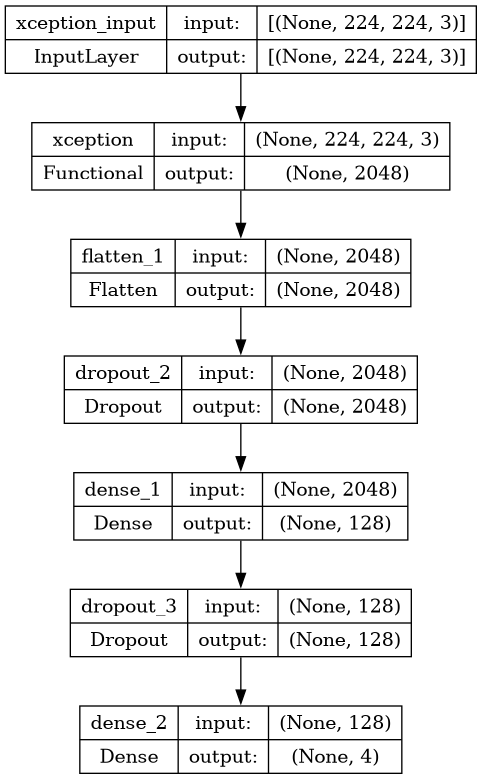

In [21]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [22]:
es = EarlyStopping(monitor='val_loss', mode='min',patience=3)
hist = model.fit(tr_gen,
                 epochs=5,
                 validation_data=valid_gen,
                 shuffle= False,
                 callbacks=es)

Epoch 1/5


I0000 00:00:1708712876.488562     164 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


75/75 [==============================] - 46s 257ms/step - loss: 0.5036 - accuracy: 0.8275 - val_loss: 0.1535 - val_accuracy: 0.9500
Epoch 2/5
75/75 [==============================] - 12s 153ms/step - loss: 0.0638 - accuracy: 0.9775 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 3/5
75/75 [==============================] - 12s 153ms/step - loss: 0.0360 - accuracy: 0.9875 - val_loss: 1.0981e-04 - val_accuracy: 1.0000
Epoch 4/5
75/75 [==============================] - 12s 153ms/step - loss: 0.0377 - accuracy: 0.9925 - val_loss: 7.4253e-04 - val_accuracy: 1.0000
Epoch 5/5
75/75 [==============================] - 12s 153ms/step - loss: 0.0260 - accuracy: 0.9908 - val_loss: 8.5794e-05 - val_accuracy: 1.0000


In [23]:
model.evaluate(ts_gen, verbose=1)

13/13 [==============================] - 2s 167ms/step - loss: 4.5567e-05 - accuracy: 1.0000


[4.5567234337795526e-05, 1.0]

In [24]:
model.save("coffee_Model.h5")

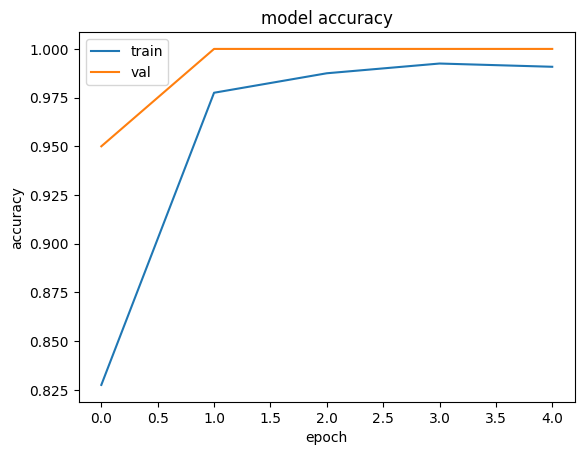

In [25]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

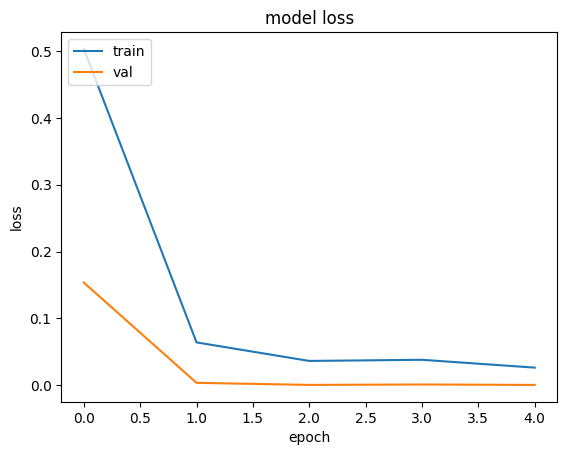

In [26]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
pred = model.predict(ts_gen)
pred = np.argmax(pred, axis=1)

labels = (tr_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

13/13 [==============================] - 2s 56ms/step


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_test = ts_df['Class']
print(classification_report(y_test, pred2))
print("Accuracy of the Model:","{:.1f}%".format(accuracy_score(y_test, pred2)*100))

              precision    recall  f1-score   support

        Dark       1.00      1.00      1.00        57
       Green       1.00      1.00      1.00        47
       Light       1.00      1.00      1.00        39
      Medium       1.00      1.00      1.00        57

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Accuracy of the Model: 100.0%


In [29]:
classes=list(tr_gen.class_indices.keys())
print (classes)

['Dark', 'Green', 'Light', 'Medium']


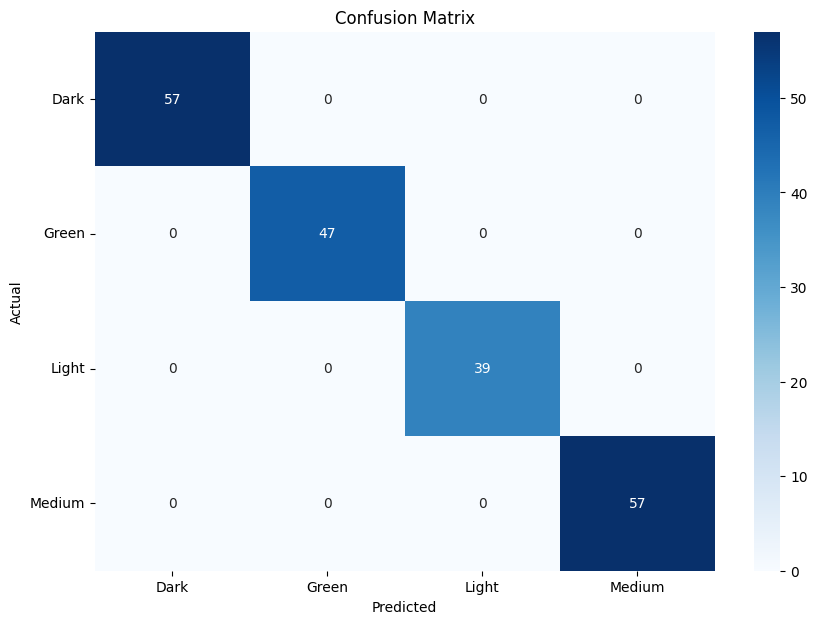

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true = ts_df['Class'].values  # Replace 'Class' with the actual column name containing the true labels
cm = confusion_matrix(y_true, pred2)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

num_classes = len(classes)

plt.xticks(ticks=[i + 0.5 for i in range(num_classes)], labels=classes, rotation=0)
plt.yticks(ticks=[i + 0.5 for i in range(num_classes)], labels=classes, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()